In [24]:
import pandas as pd
import numpy as np
from knn import KNN
from cnn import condensed_nearest_neighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
dataset = pd.read_excel(r"C:\Users\alber\OneDrive - INTEC\LAB MACHINE LEARNING\P2\knn_dataset.xlsx",sheet_name="Programming_exercise")
trainX = pd.read_excel(r"C:\Users\alber\OneDrive - INTEC\LAB MACHINE LEARNING\P2\knn_dataset.xlsx",sheet_name="Programming_exercise", usecols=[2,3,4])
trainY = pd.read_excel(r"C:\Users\alber\OneDrive - INTEC\LAB MACHINE LEARNING\P2\knn_dataset.xlsx",sheet_name="Programming_exercise", usecols=[1])
X_test = pd.read_excel(r"C:\Users\alber\OneDrive - INTEC\LAB MACHINE LEARNING\P2\knn_dataset.xlsx",sheet_name="Programming_exercise", usecols=[9,10,11])
Y_test = pd.read_excel(r"C:\Users\alber\OneDrive - INTEC\LAB MACHINE LEARNING\P2\knn_dataset.xlsx",sheet_name="Programming_exercise", usecols=[8])

In [26]:
trainX = np.array(trainX)
trainY = np.array(trainY)
X_test = np.array(X_test)
Y_test = np.array(Y_test)


In [27]:
S,S_labels = condensed_nearest_neighbors(trainX[1:,:],trainY[1:,:])
print(S.shape)
print(S_labels.shape)

(6551, 3)
(6551, 1)


Text(0.5, 1.0, 'Clasificador KNN')

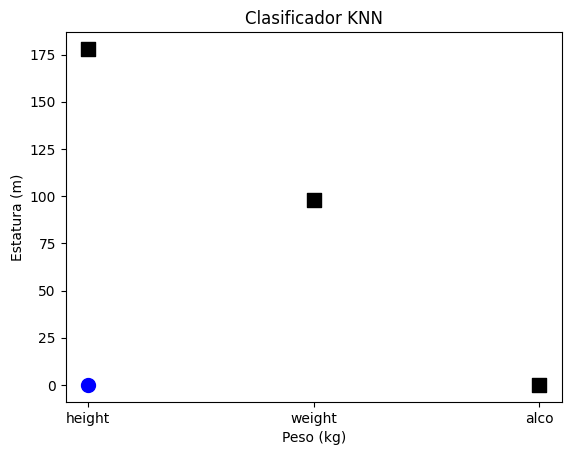

In [28]:
for i in range(S.shape[1]):
    if S_labels[i]==1:
        marcar = 'v'
        color = 'red'
    else:
        marcar ='o'
        color ='blue'
    plt.scatter(x=S[0,i],y=S[1,i],c = color,s =100,marker = marcar)
for j  in range(X_test.shape[1]):
    plt.scatter(x=X_test[0,j],y=X_test[1,j],c = 'black',s =100,marker = 's')
    
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (m)')
plt.title('Clasificador KNN')

> $K = 3$

In [29]:
X_test = X_test[1:20001,:]
print(X_test.shape)
Y_test = Y_test[1:20001,:]

clasificador = KNN(k=3)
clasificador.aprendizaje(S.transpose(),S_labels)
clasificar = clasificador.clasificacion(X_test.transpose())

print("Prediccion", clasificar)

(20000, 3)
Prediccion [2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,

In [30]:
def confusionmatrix(ytest, prediccion):

    # extract the different classes
    clase = np.unique(ytest)

    # initialize the confusion matrix
    matrix = np.zeros((len(clase), len(clase)))

    # loop across the different combinations of actual / predicted classes
    for i in range(len(clase)):
        for j in range(len(clase)):

           # count the number of instances in each combination of actual / predicted classes
           matrix[i, j] = np.sum((ytest == clase[i]) & (prediccion == clase[j]))

    return matrix

In [31]:
print("Y_test \n", Y_test.shape)
clasificar = np.array(clasificar)
print("Clasificar \n", clasificar.shape)

cm = confusionmatrix(Y_test.transpose(),clasificar)
print("Confusion matrix \n",cm)

Y_test 
 (20000, 1)
Clasificar 
 (20000,)
Confusion matrix 
 [[7994. 5001.]
 [2621. 4384.]]


In [32]:
def accuracy(confusion_matrix):
    aciertos = np.sum(np.diag(confusion_matrix))
    total = np.sum(confusion_matrix)
    accuracy = aciertos / total
    return accuracy

In [33]:
certeza = accuracy(cm)
print("Acierto:", certeza)

Acierto: 0.6189


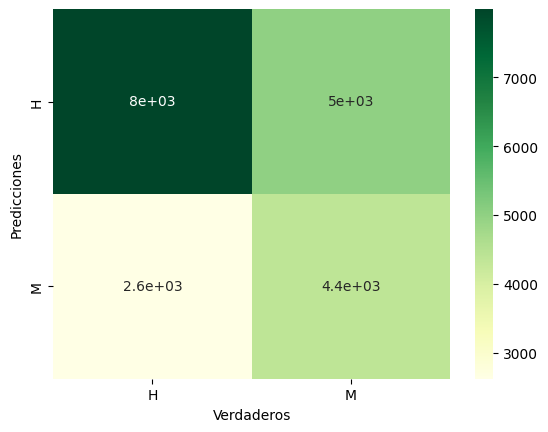

In [34]:
MC = ['H','M']
df_cm = pd.DataFrame(cm,index=MC,columns=MC)
grafica = sns.heatmap(df_cm,cmap='YlGn',annot=True)
plt.ylabel('ValoresVerdaderos')
plt.xlabel('Predicciones')
grafica.set(xlabel='Verdaderos',ylabel='Predicciones')
plt.show()

> $ K = 5$

In [35]:
clasificador = KNN(k=5)
clasificador.aprendizaje(S.transpose(),S_labels)
clasificar = clasificador.clasificacion(X_test.transpose())

print("Prediccion", clasificar)
clasificar = np.array(clasificar)

Prediccion [2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1

In [36]:

cm = confusionmatrix(Y_test.transpose(),clasificar)
print("Confusion matrix \n",cm)

Confusion matrix 
 [[7756. 5239.]
 [2352. 4653.]]


In [37]:
certeza = accuracy(cm)
print("Acierto:", certeza)

Acierto: 0.62045


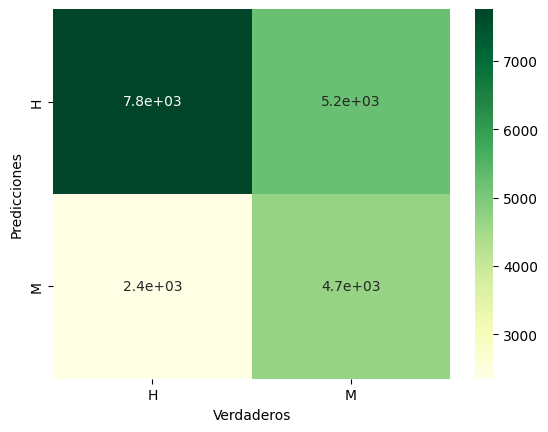

In [38]:
MC = ['H','M']
df_cm = pd.DataFrame(cm,index=MC,columns=MC)
grafica = sns.heatmap(df_cm,cmap='YlGn',annot=True)
plt.ylabel('ValoresVerdaderos')
plt.xlabel('Predicciones')
grafica.set(xlabel='Verdaderos',ylabel='Predicciones')
plt.show()

> $ K = 7$

In [39]:
clasificador = KNN(k=7)
clasificador.aprendizaje(S.transpose(),S_labels)
clasificar = clasificador.clasificacion(X_test.transpose())

print("Prediccion", clasificar)
clasificar = np.array(clasificar)

Prediccion [2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1

In [40]:

cm = confusionmatrix(Y_test.transpose(),clasificar)
print("Confusion matrix \n",cm)

Confusion matrix 
 [[8060. 4935.]
 [2399. 4606.]]


In [41]:
certeza = accuracy(cm)
print("Acierto:", certeza)

Acierto: 0.6333


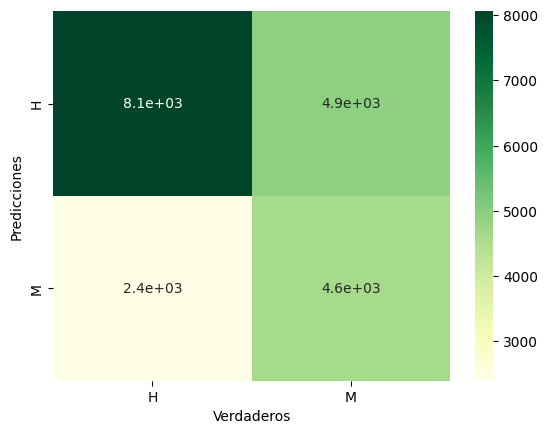

In [42]:
MC = ['H','M']
df_cm = pd.DataFrame(cm,index=MC,columns=MC)
grafica = sns.heatmap(df_cm,cmap='YlGn',annot=True)
plt.ylabel('ValoresVerdaderos')
plt.xlabel('Predicciones')
grafica.set(xlabel='Verdaderos',ylabel='Predicciones')
plt.show()

>$K=9$

In [43]:
clasificador = KNN(k=9)
clasificador.aprendizaje(S.transpose(),S_labels)
clasificar = clasificador.clasificacion(X_test.transpose())

print("Prediccion", clasificar)
clasificar = np.array(clasificar)

Prediccion [2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1

In [44]:
cm = confusionmatrix(Y_test.transpose(),clasificar)
print("Confusion matrix \n",cm)

Confusion matrix 
 [[8362. 4633.]
 [2299. 4706.]]


In [45]:
certeza = accuracy(cm)
print("Acierto:", certeza)

Acierto: 0.6534


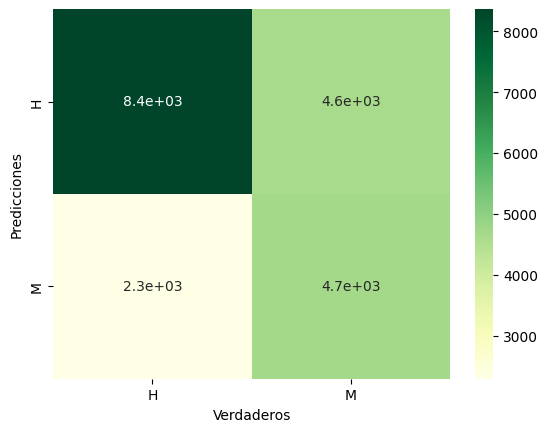

In [46]:
MC = ['H','M']
df_cm = pd.DataFrame(cm,index=MC,columns=MC)
grafica = sns.heatmap(df_cm,cmap='YlGn',annot=True)
plt.ylabel('ValoresVerdaderos')
plt.xlabel('Predicciones')
grafica.set(xlabel='Verdaderos',ylabel='Predicciones')
plt.show()

>$K=15$

In [47]:
clasificador = KNN(k=9)
clasificador.aprendizaje(S.transpose(),S_labels)
clasificar = clasificador.clasificacion(X_test.transpose())

print("Prediccion", clasificar)
clasificar = np.array(clasificar)

Prediccion [2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1

In [48]:
cm = confusionmatrix(Y_test.transpose(),clasificar)
print("Confusion matrix \n",cm)

Confusion matrix 
 [[8362. 4633.]
 [2299. 4706.]]


In [49]:
certeza = accuracy(cm)
print("Acierto:", certeza)

Acierto: 0.6534


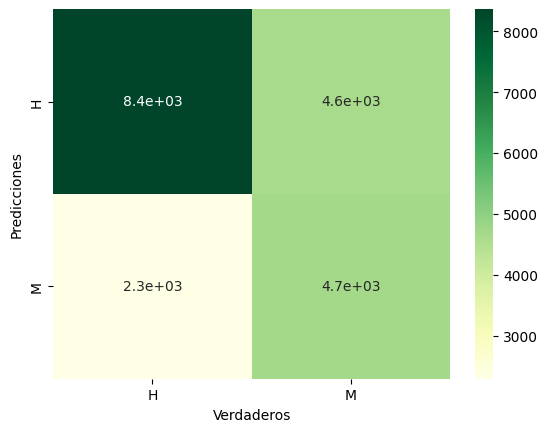

In [50]:
MC = ['H','M']
df_cm = pd.DataFrame(cm,index=MC,columns=MC)
grafica = sns.heatmap(df_cm,cmap='YlGn',annot=True)
plt.ylabel('ValoresVerdaderos')
plt.xlabel('Predicciones')
grafica.set(xlabel='Verdaderos',ylabel='Predicciones')
plt.show()